# **Lesson 06**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os

In [2]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params
%matplotlib inline

# Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

## Equilibration

In [3]:
U_metro_02 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
U_metro_16 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
U_metro_30 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

C_metro_02 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
C_metro_16 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
C_metro_30 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

X_metro_02 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
X_metro_16 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
X_metro_30 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

M_metro_02 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=0.200.csv', delimiter=',', skiprows=1)
M_metro_16 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=1.600.csv', delimiter=',', skiprows=1)
M_metro_30 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=3.000.csv', delimiter=',', skiprows=1)


U_gibbs_02 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
U_gibbs_16 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
U_gibbs_30 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

C_gibbs_02 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
C_gibbs_16 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
C_gibbs_30 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

X_gibbs_02 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
X_gibbs_16 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
X_gibbs_30 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

M_gibbs_02 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=0.200.csv', delimiter=',', skiprows=1)
M_gibbs_16 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=1.600.csv', delimiter=',', skiprows=1)
M_gibbs_30 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=3.000.csv', delimiter=',', skiprows=1)

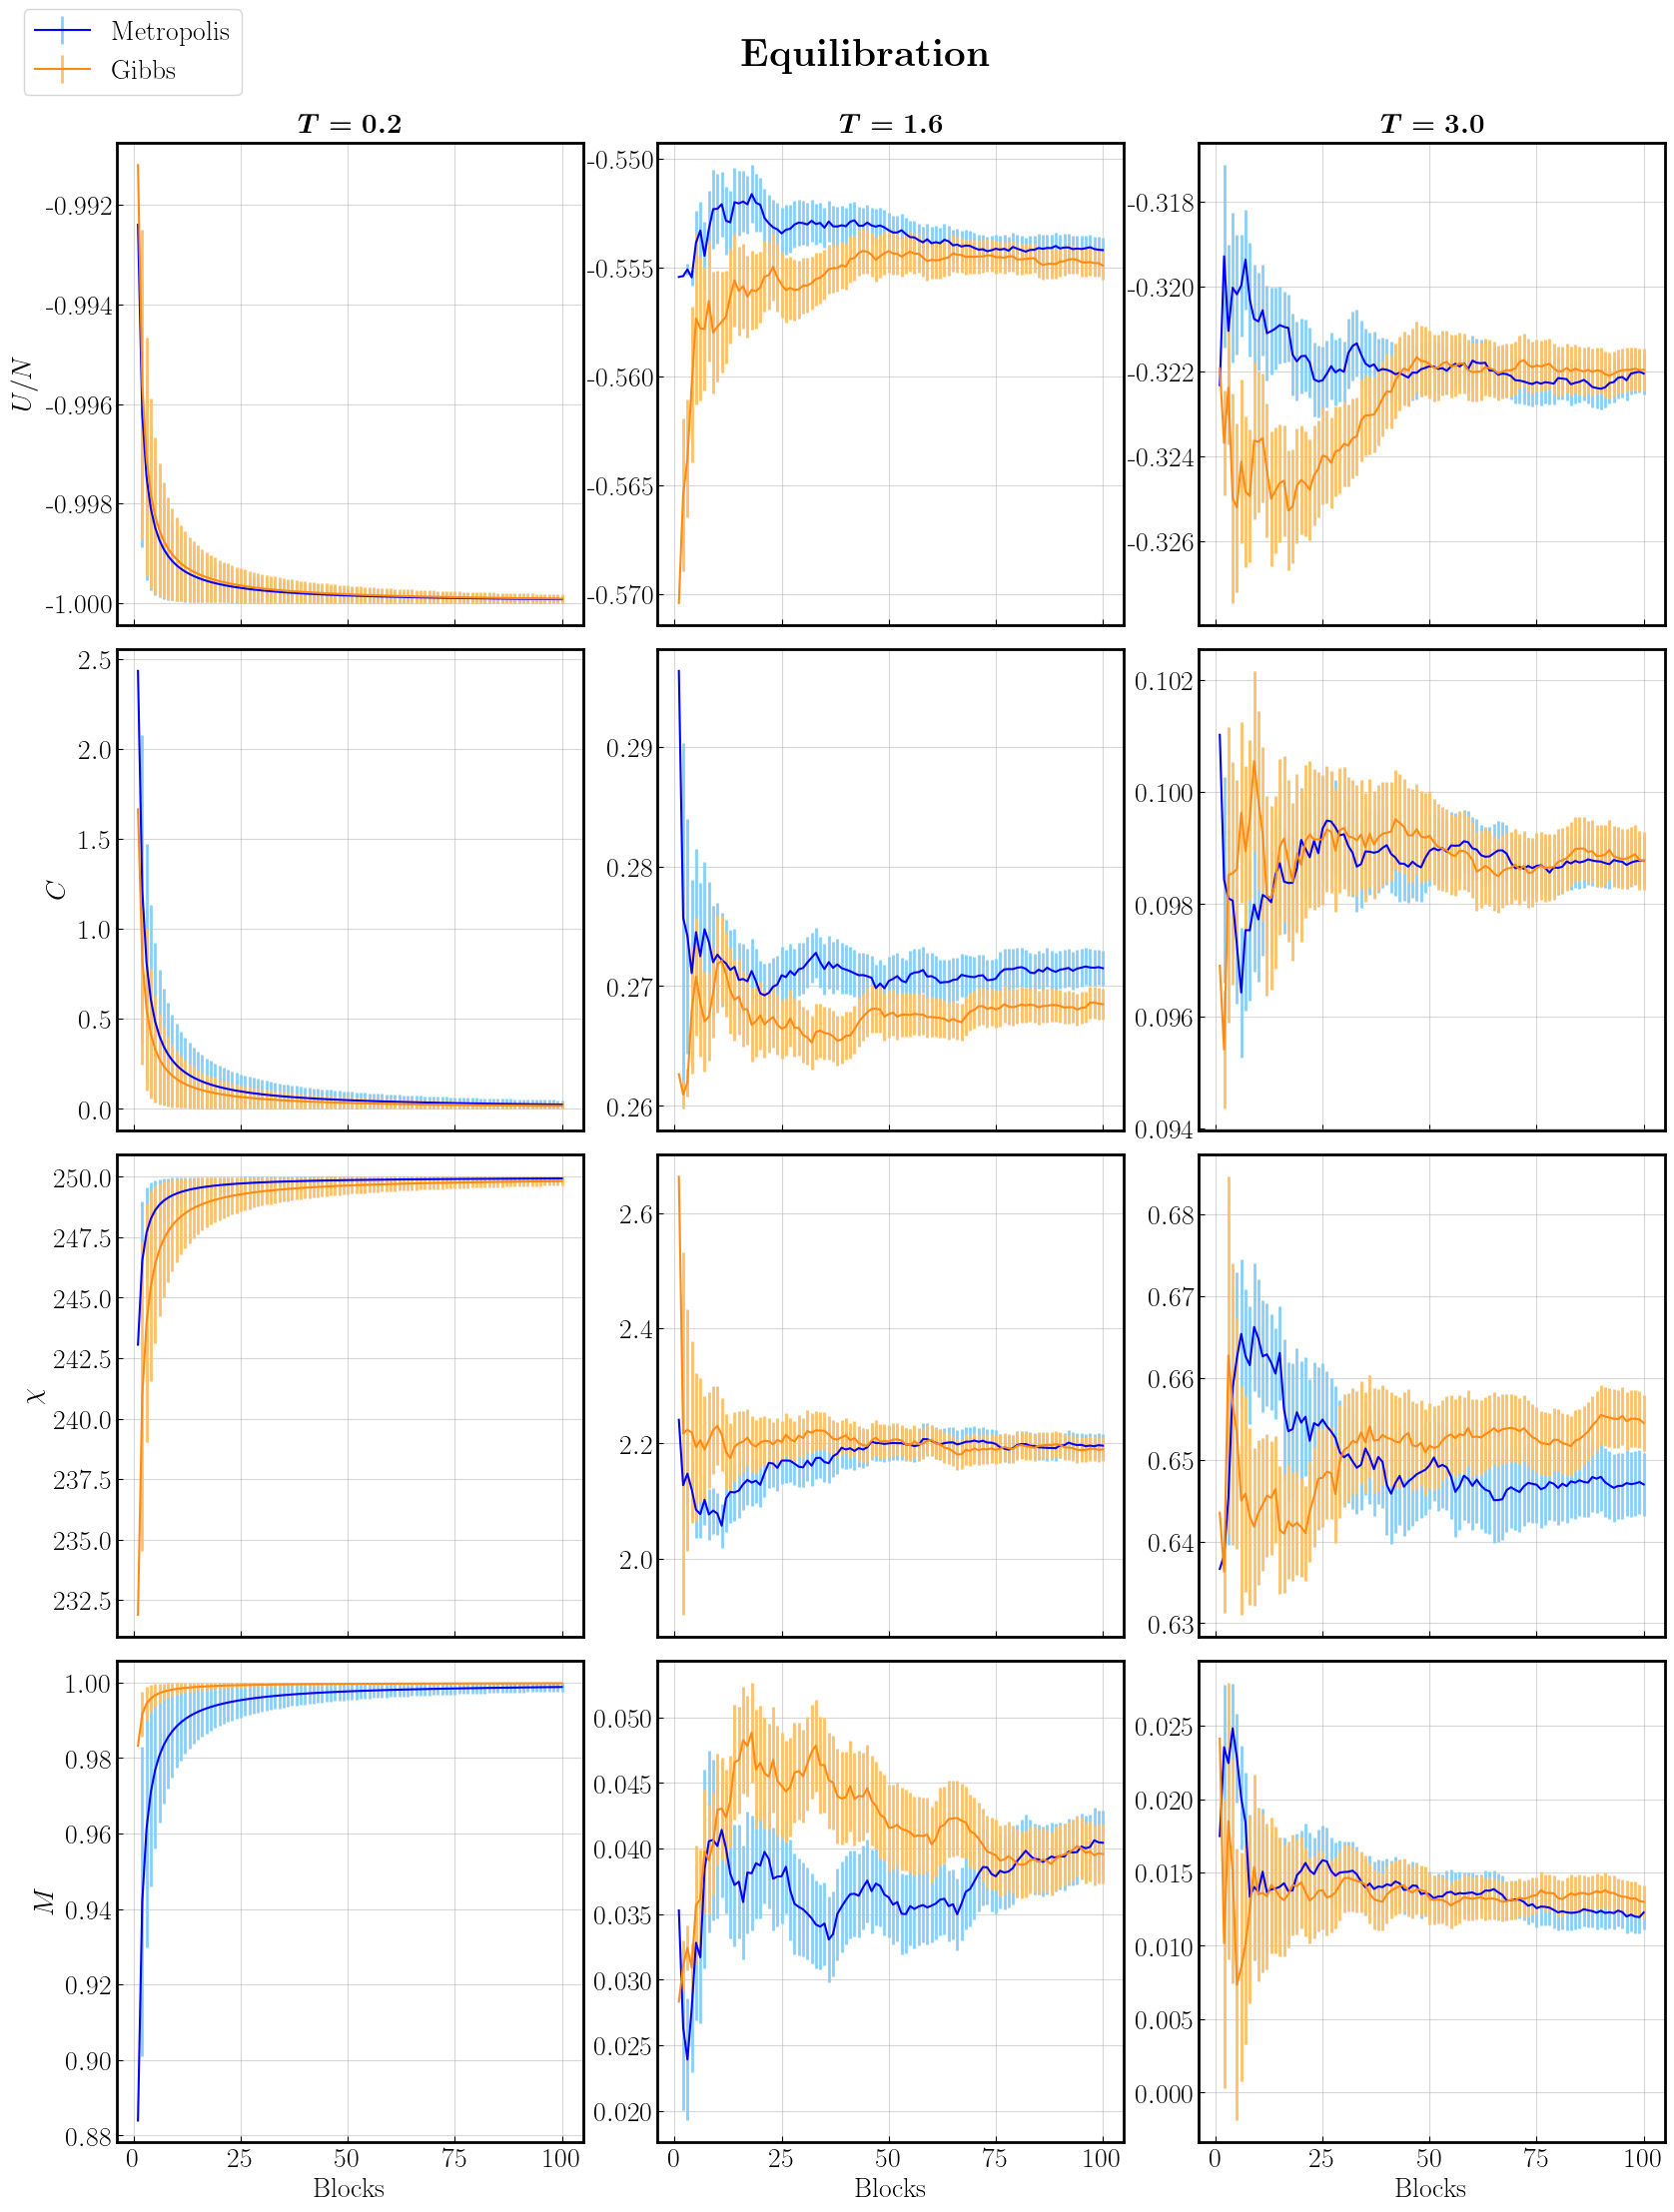

In [4]:
fig, axs = plt.subplots(4, 3, figsize=(20,26), gridspec_kw={'hspace': 0.05, 'wspace': 0.16})
fig.suptitle(r'\textbf{Equilibration}', fontsize=28, y=0.92)


axs[0,0].set_title(r'\boldmath $T=0.2$', pad=8)
axs[0,1].set_title(r'\boldmath $T=1.6$', pad=8)
axs[0,2].set_title(r'\boldmath $T=3.0$', pad=8)


axs[0,0].errorbar(U_metro_02[:,0], U_metro_02[:,2], yerr=U_metro_02[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[0,0].errorbar(U_gibbs_02[:,0], U_gibbs_02[:,2], yerr=U_gibbs_02[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[0,1].errorbar(U_metro_16[:,0], U_metro_16[:,2], yerr=U_metro_16[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[0,1].errorbar(U_gibbs_16[:,0], U_gibbs_16[:,2], yerr=U_gibbs_16[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[0,2].errorbar(U_metro_30[:,0], U_metro_30[:,2], yerr=U_metro_30[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[0,2].errorbar(U_gibbs_30[:,0], U_gibbs_30[:,2], yerr=U_gibbs_30[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')

axs[0,0].set_ylabel('$U/N$', labelpad=6)


axs[1,0].errorbar(C_metro_02[:,0], C_metro_02[:,2], yerr=C_metro_02[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[1,0].errorbar(C_gibbs_02[:,0], C_gibbs_02[:,2], yerr=C_gibbs_02[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[1,1].errorbar(C_metro_16[:,0], C_metro_16[:,2], yerr=C_metro_16[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[1,1].errorbar(C_gibbs_16[:,0], C_gibbs_16[:,2], yerr=C_gibbs_16[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[1,2].errorbar(C_metro_30[:,0], C_metro_30[:,2], yerr=C_metro_30[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[1,2].errorbar(C_gibbs_30[:,0], C_gibbs_30[:,2], yerr=C_gibbs_30[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')

axs[1,0].set_ylabel('$C$', labelpad=6)


axs[2,0].errorbar(X_metro_02[:,0], X_metro_02[:,2], yerr=X_metro_02[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[2,0].errorbar(X_gibbs_02[:,0], X_gibbs_02[:,2], yerr=X_gibbs_02[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[2,1].errorbar(X_metro_16[:,0], X_metro_16[:,2], yerr=X_metro_16[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[2,1].errorbar(X_gibbs_16[:,0], X_gibbs_16[:,2], yerr=X_gibbs_16[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[2,2].errorbar(X_metro_30[:,0], X_metro_30[:,2], yerr=X_metro_30[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[2,2].errorbar(X_gibbs_30[:,0], X_gibbs_30[:,2], yerr=X_gibbs_30[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')

axs[2,0].set_ylabel('$\chi$', labelpad=6)


axs[3,0].errorbar(M_metro_02[:,0], M_metro_02[:,2], yerr=M_metro_02[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[3,0].errorbar(M_gibbs_02[:,0], M_gibbs_02[:,2], yerr=M_gibbs_02[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[3,1].errorbar(M_metro_16[:,0], M_metro_16[:,2], yerr=M_metro_16[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[3,1].errorbar(M_gibbs_16[:,0], M_gibbs_16[:,2], yerr=M_gibbs_16[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[3,2].errorbar(M_metro_30[:,0], M_metro_30[:,2], yerr=M_metro_30[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[3,2].errorbar(M_gibbs_30[:,0], M_gibbs_30[:,2], yerr=M_gibbs_30[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')

axs[3,0].set_ylabel('$M$', labelpad=6)


axs[-1,0].set_xlabel('Blocks')
axs[-1,1].set_xlabel('Blocks')
axs[-1,2].set_xlabel('Blocks')

for i in range(3) :
    for j in range(3) :
        axs[j,i].set_xticklabels([])

axs[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[0,1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[0,2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))


axs[0,0].legend(loc=(-0.2,1.1))

plt.show()

## Simulations

In [5]:
data_H0_metro = np.loadtxt('06.1/Metropolis/OUTPUT/summary_H=0.00.csv', delimiter=',', skiprows=1)
data_H2_metro = np.loadtxt('06.1/Metropolis/OUTPUT/summary_H=0.02.csv', delimiter=',', skiprows=1)
data_H0_gibbs = np.loadtxt('06.1/Gibbs/OUTPUT/summary_H=0.00.csv', delimiter=',', skiprows=1)
data_H2_gibbs = np.loadtxt('06.1/Gibbs/OUTPUT/summary_H=0.02.csv', delimiter=',', skiprows=1)

In [6]:
# computing theorical values
T = data_H0_metro[:,0]
beta = 1/T
J = 1.0
N = 50
th = np.tanh(J/T)
thN= th**N
ch = 1/th
h=0.02 #external field

### Internal energy

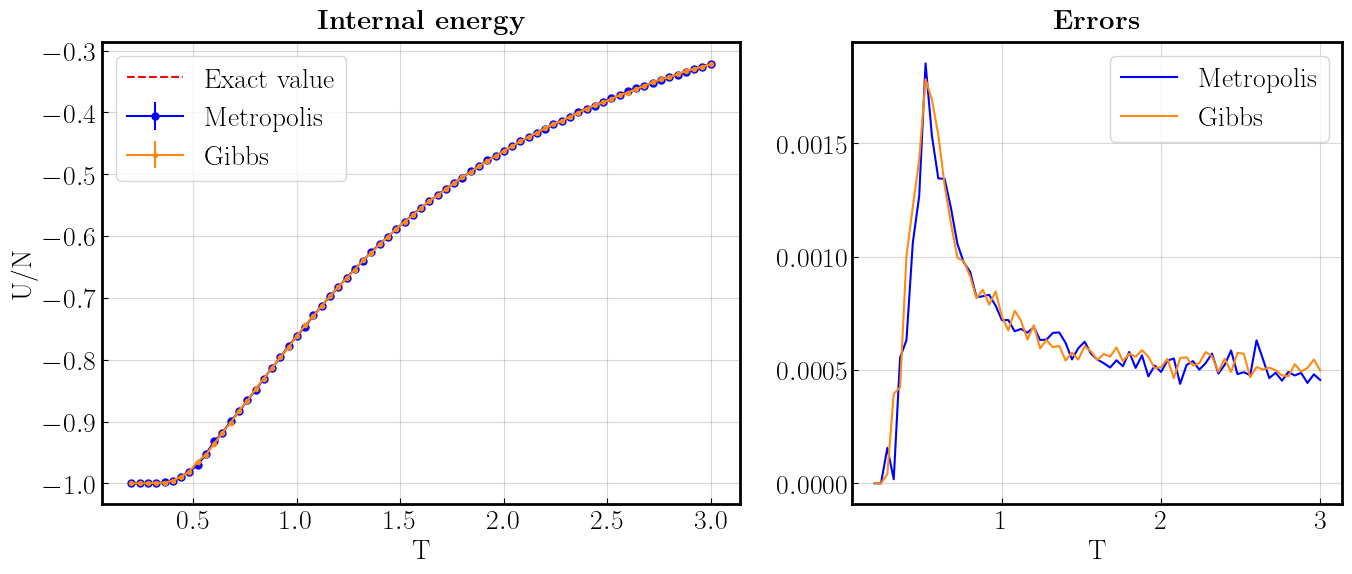

In [7]:
U = -J*( th + ch*thN )/( 1 + thN )

fig, axs = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0].errorbar(T, data_H0_metro[:,1], yerr=data_H0_metro[:,2], marker='o', markersize=5, color='blue', label='Metropolis')
axs[0].errorbar(T, data_H0_gibbs[:,1], yerr=data_H0_gibbs[:,2], marker='o', markersize=3, color='#FF8A13', label='Gibbs')
axs[0].plot(T, U, color='red', linestyle='--', label='Exact value')

axs[0].set_title(r'\textbf{Internal energy}', pad=10)
axs[0].set_xlabel('T')
axs[0].set_ylabel('U/N')
axs[0].legend()

axs[1].plot(T, data_H0_metro[:,2], color='blue', label='Metropolis')
axs[1].plot(T, data_H0_gibbs[:,2], color='#FF8A13', label='Gibbs')

axs[1].set_title(r'\textbf{Errors}', pad=10)
axs[1].set_xlabel('T')
axs[1].legend()

plt.show()

### Heat capacity

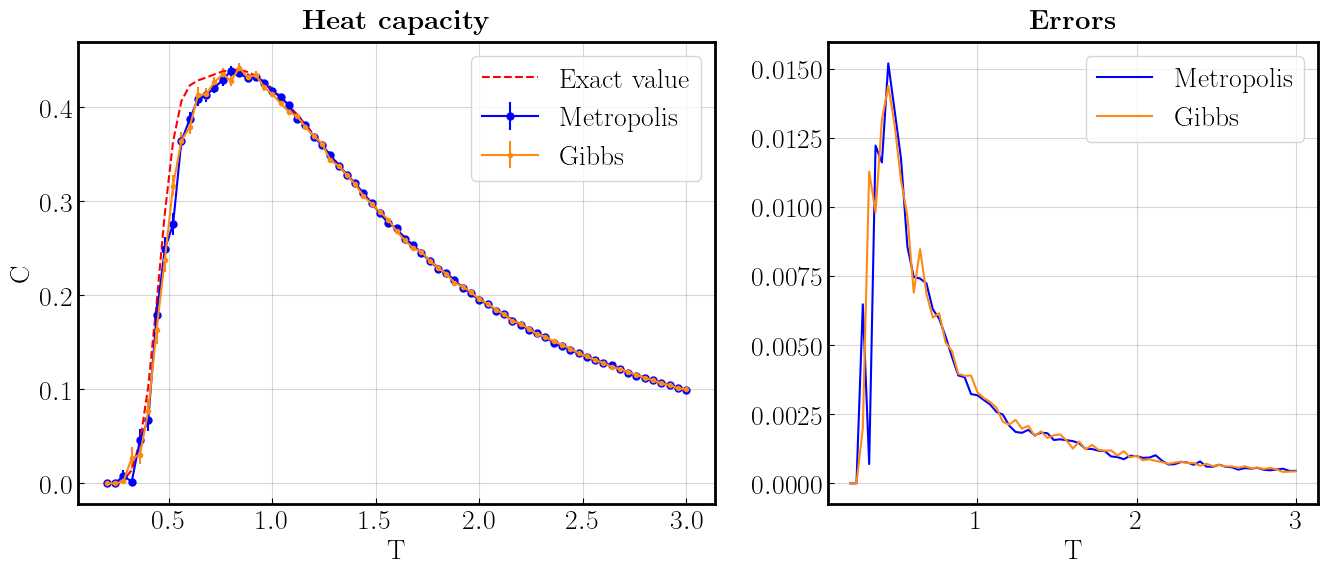

In [8]:
CV = ((beta*J)**2)*(((1+thN+(N-1)*(th**2)+(N-1)*(ch**2)*thN)/(1+thN))-N*((th+ch*thN)/(1+thN))**2)

fig, axs = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0].errorbar(T, data_H0_metro[:,3], yerr=data_H0_metro[:,4], marker='o', markersize=5, color='blue', label='Metropolis')
axs[0].errorbar(T, data_H0_gibbs[:,3], yerr=data_H0_gibbs[:,4], marker='o', markersize=3, color='#FF8A13', label='Gibbs')
axs[0].plot(T, CV, color='red', linestyle='--', label='Exact value')

axs[0].set_title(r'\textbf{Heat capacity}', pad=10)
axs[0].set_xlabel('T')
axs[0].set_ylabel('C')
axs[0].legend()

axs[1].plot(T, data_H0_metro[:,4], color='blue', label='Metropolis')
axs[1].plot(T, data_H0_gibbs[:,4], color='#FF8A13', label='Gibbs')

axs[1].set_title(r'\textbf{Errors}', pad=10)
axs[1].set_xlabel('T')
axs[1].legend()

plt.show()

### Magnetic susceptibility

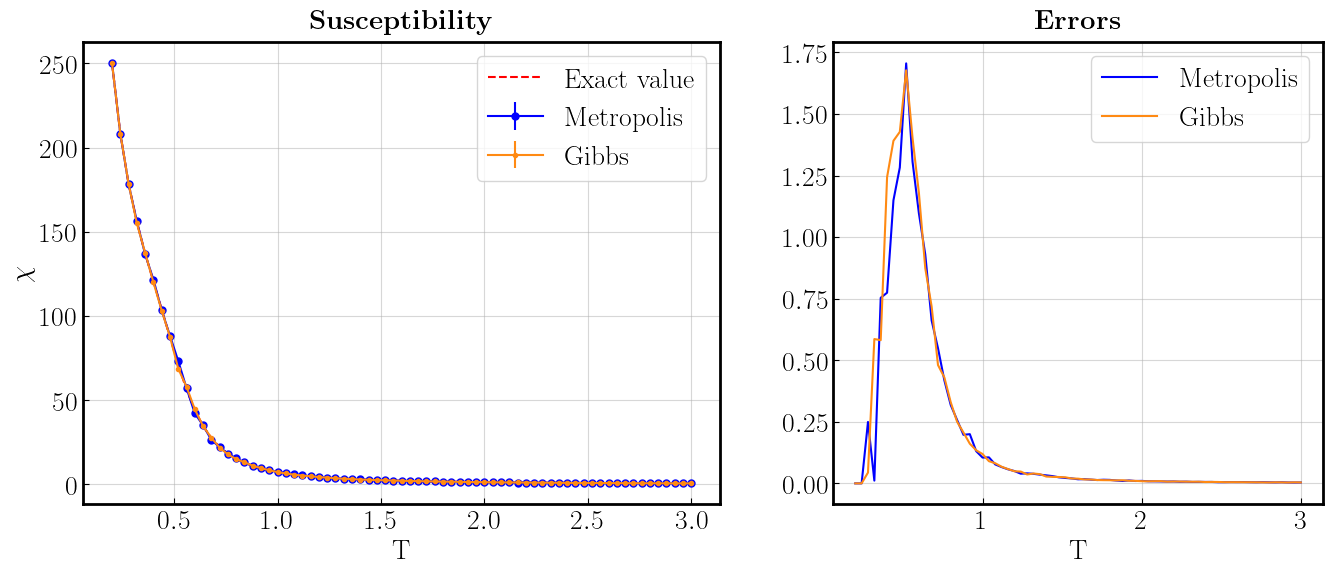

In [9]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

fig, axs = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0].errorbar(T, data_H0_metro[:,5], yerr=data_H0_metro[:,6], marker='o', markersize=5, color='blue', label='Metropolis')
axs[0].errorbar(T, data_H0_gibbs[:,5], yerr=data_H0_gibbs[:,6], marker='o', markersize=3, color='#FF8A13', label='Gibbs')
axs[0].plot(T, X, color='red', linestyle='--', label='Exact value')

axs[0].set_title(r'\textbf{Susceptibility}', pad=10)
axs[0].set_xlabel('T')
axs[0].set_ylabel('$\chi$')
axs[0].legend()

axs[1].plot(T, data_H0_metro[:,6], color='blue', label='Metropolis')
axs[1].plot(T, data_H0_gibbs[:,6], color='#FF8A13', label='Gibbs')

axs[1].set_title(r'\textbf{Errors}', pad=10)
axs[1].set_xlabel('T')
axs[1].legend()

plt.show()

### Magnetization

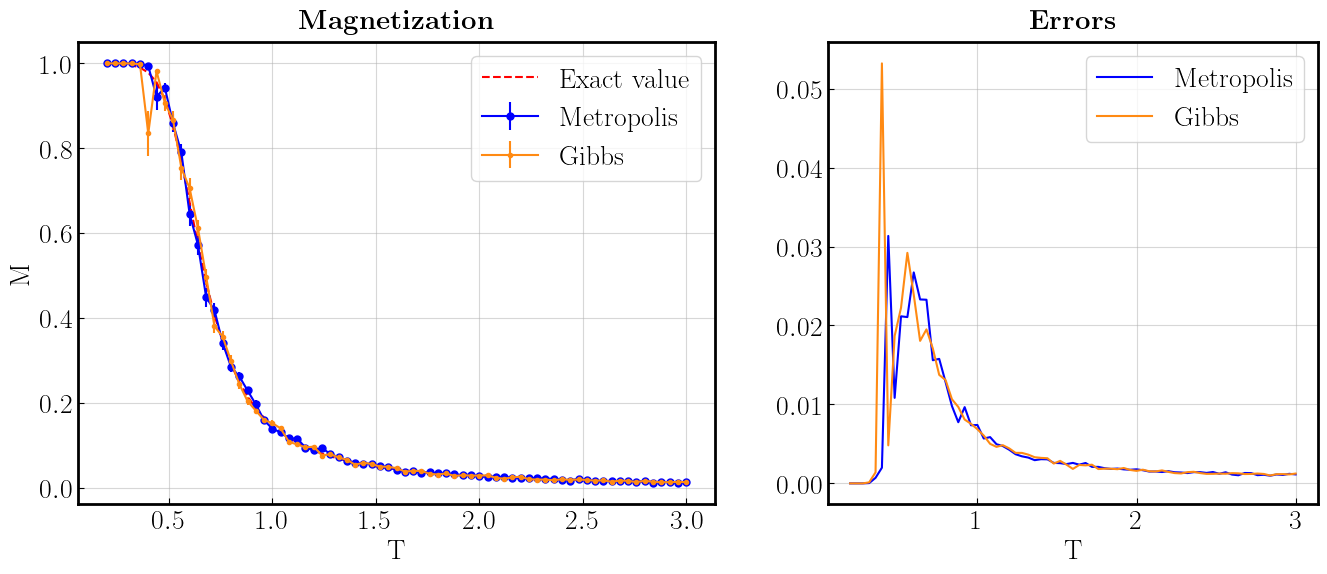

In [10]:
l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**N + l2**N
M = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(N-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(N-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)

fig, axs = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0].errorbar(T, data_H2_metro[:,3], yerr=data_H2_metro[:,4], marker='o', markersize=5, color='blue', label='Metropolis')
axs[0].errorbar(T, data_H2_gibbs[:,3], yerr=data_H2_gibbs[:,4], marker='o', markersize=3, color='#FF8A13', label='Gibbs')
axs[0].plot(T, M, color='red', linestyle='--', label='Exact value')

axs[0].set_title(r'\textbf{Magnetization}', pad=10)
axs[0].set_xlabel('T')
axs[0].set_ylabel('M')
axs[0].legend()

axs[1].plot(T, data_H2_metro[:,4], color='blue', label='Metropolis')
axs[1].plot(T, data_H2_gibbs[:,4], color='#FF8A13', label='Gibbs')

axs[1].set_title(r'\textbf{Errors}', pad=10)
axs[1].set_xlabel('T')
axs[1].legend()

plt.show()